# Fine tuning object detection model: YOLOv8

Primero clonamos el repositorio de YOLO, instalamos la linrería de ultralytics que contine YOLOv8

In [ ]:

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n


Instalamos Roboflow para manejar nuestro conjunto de datos.


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.3 MB/s eta 0:00:00


Importamos algunas librerías necesarias  como torch, ademas de algunas funciones para mostrar imágenes y limpiar la salida en IPytho, ademas de eso imprime un mensaje indicando que la confoguración está completa y muestra la versión de TOrch.Y si la GPU esta disponible.

In [ ]:

import torch
from IPython.display import Image, clear_output
print('Setup complete. Using torch %s  %s' % (
    torch.__version__,
    torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'
))

Setup complete. Using torch 2.6.0+cu124  _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=cf15cdd0-ed1d-154b-c078-2be0da7782ea, L2_cache_size=4MB)


Importa el módulo principal de roboflow ademas de importar la clase para interactuar con la API.


In [ ]:
import roboflow
from roboflow import Roboflow

Aseguramos que la librería roboflow esté instalada, importamos la clase de roboflo e iniciamos en la cuenta con la API, donde seleccionaremos el proyecto y espacio de trabajo específicos.

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="q12cEnS8GejYyC3IZk3H")
project = rf.workspace("deteccion-vzvys").project("mcr-final-challenge")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MCR-Final-Challenge-2 in yolov8:: 100%|██████████| 10572/10572 [00:01<00:00, 8834.73it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


mostramos el contenido del archivo "data.yaml" para ver la configuración del dataset, este archivo contiene información como el númeor y nombre de las clases y la participación del dataset para validación y entrenamiento.

In [ ]:
%cat {dataset.location}/data.yaml

names:
- Adelante
- Alto
- Amarillo
- Construccion
- Derecha
- GiveWay
- Izquierda
- Rojo
- Verde
nc: 9
roboflow:
  license: CC BY 4.0
  project: mcr-final-challenge
  url: https://universe.roboflow.com/deteccion-vzvys/mcr-final-challenge/dataset/2
  version: 2
  workspace: deteccion-vzvys
test: ../test/images
train: ../train/images
val: ../valid/images


Definimos el numero de clases, importamos la librería yaml a partir del mismo archivo y para eso lo tenemos que abrir y cargar el contenido y extraemos el numero de clases.

In [ ]:
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

Definimos una función mágica de IPython personalizada para escribir archivos a partir de plantillas que pueden incluir variables de Python.
Personalizamos la función 'writefile' de IPython para que podamos escribir variables.
Abre el archivo especificado en 'line' en modo escritura ('w').
Escribe el contenido de 'cell' en el archivo, formateando las variables
utilizando el diccionario global de variables de Python.

In [ ]:
from IPython.core.magic import register_line_cell_magic
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

Entrenamos el modelo YOLOv8s con nuestro conjunto de datos personalizado durante 50 épocas.También configuramos algunos parámetros de aumentación de datos.
Inicializa el modelo YOLOv8s pre-entrenado. 'yolov8s.pt' es un modelo base más pequeño.
Tamaño del batch de entrenamiento.
Tamaño de la imagen para el entrenamiento.
Nombre para la carpeta donde se guardarán los resultados del entrenamiento.
Almacena las imágenes y etiquetas en caché para acelerar el entrenamiento.
Rango de rotación aleatoria en grados para aumentación de datos (0.0 = sin rotación).
Probabilidad de volteo vertical para aumentación de datos (0.0 = sin volteo).
Probabilidad de volteo horizontal para aumentación de datos (0.0 = sin volteo).
esto se hizo así debido a que se presentaron algunos problemas en el reconocimiento de las señales.
Descargamos los archivos de pesos entrenados del modelo.

Importa la función files de google.colab para descargar archivos.
Descarga el archivo de pesos que obtuvo el mejor rendimiento durante el entrenamiento ('best.pt').
La ruta se construye basándose en el nombre de la carpeta de resultados especificado anteriormente.
files.download('runs/detect/yolov8s_results_custom_aug/weights/best.pt')
Descarga el archivo de pesos de la última época de entrenamiento ('last.pt').
files.download('runs/detect/yolov8s_results_custom_aug/weights/last.pt')

In [ ]:
from ultralytics import YOLO
import os

model = YOLO('yolov8s.pt')
model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=55,
    batch=16,
    imgsz=640,
    name='yolov8s_results_custom_aug',
    cache=True,
    degrees=0.0,
    flipud=0.0,
    fliplr=0.0
)

from google.colab import files
files.download('runs/detect/yolov8s_results_custom_aug/weights/best.pt')
files.download('runs/detect/yolov8s_results_custom_aug/confusion_matrix.png')
files.download('runs/detect/yolov8s_results_custom_aug/results.png')

100%|██████████| 21.5M/21.5M [00:00<00:00, 291MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/MCR-Final-Challenge-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=55, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_results_custom_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

100%|██████████| 755k/755k [00:00<00:00, 36.7MB/s]

Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2119531  ultralytics.nn.modules.head.Detect           [9, [128, 256, 512]]          
Model summary: 129 layers, 11,139,083 parameters, 11,139,067 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 156MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 646.6±316.1 MB/s, size: 26.1 KB)


train: Scanning /content/MCR-Final-Challenge-2/train/labels... 4620 images, 747 backgrounds, 0 corrupt: 100%|██████████| 4620/4620 [00:02<00:00, 1771.91it/s]


train: New cache created: /content/MCR-Final-Challenge-2/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.3GB RAM): 100%|██████████| 4620/4620 [00:11<00:00, 418.41it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 480.7±207.8 MB/s, size: 23.9 KB)


val: Scanning /content/MCR-Final-Challenge-2/valid/labels... 440 images, 73 backgrounds, 0 corrupt: 100%|██████████| 440/440 [00:00<00:00, 987.56it/s]

val: New cache created: /content/MCR-Final-Challenge-2/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.5GB RAM): 100%|██████████| 440/440 [00:01<00:00, 319.68it/s]


Plotting labels to runs/detect/yolov8s_results_custom_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_results_custom_aug
Starting training for 55 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/55      3.69G     0.7109      2.466     0.9837         20        640: 100%|██████████| 289/289 [01:25<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]

                   all        440        367      0.971      0.984       0.99      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/55      4.48G     0.6021     0.7445     0.9271         23        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        440        367      0.983      0.957      0.986      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/55      4.52G      0.595     0.6564     0.9284         19        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        440        367      0.971      0.968       0.99      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/55      4.55G     0.5627     0.5727       0.92         13        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]

                   all        440        367      0.982      0.995       0.99      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/55      4.59G     0.5305     0.5337     0.9099         21        640: 100%|██████████| 289/289 [01:20<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        440        367      0.961      0.991      0.988      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/55      4.62G     0.5127      0.497      0.903         15        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        440        367      0.939      0.938      0.974      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/55      4.66G     0.4974     0.4718     0.8953         17        640: 100%|██████████| 289/289 [01:20<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        440        367      0.985      0.997      0.992      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/55       4.7G     0.4839     0.4507       0.89         15        640: 100%|██████████| 289/289 [01:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        440        367       0.99      0.997      0.991      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/55      4.73G     0.4745     0.4406     0.8858         21        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        440        367      0.993      0.997      0.993      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/55      4.77G     0.4632     0.4294     0.8852         14        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        440        367      0.995      0.995      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/55      4.81G     0.4629     0.4188     0.8843         18        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        440        367      0.982      0.997       0.99      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/55      4.84G     0.4438     0.3936     0.8785         16        640: 100%|██████████| 289/289 [01:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.92it/s]

                   all        440        367      0.976      0.986      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/55      4.88G     0.4432     0.3898     0.8771         23        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        440        367      0.991      0.997      0.992      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/55      4.91G     0.4396     0.3779     0.8755         15        640: 100%|██████████| 289/289 [01:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        440        367      0.988      0.997      0.992      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/55      4.95G     0.4281     0.3682     0.8752         19        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        440        367      0.991      0.997      0.992      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/55      4.99G     0.4254     0.3498     0.8707         13        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

                   all        440        367       0.99      0.997       0.99      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/55      5.03G     0.4118     0.3513     0.8711         18        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        440        367      0.991      0.995      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/55      5.06G     0.4133     0.3487     0.8701         12        640: 100%|██████████| 289/289 [01:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

                   all        440        367      0.988      0.997      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/55       5.1G     0.4083     0.3431     0.8695         22        640: 100%|██████████| 289/289 [01:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.34it/s]

                   all        440        367      0.991      0.997      0.992      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/55      5.13G     0.4004     0.3362     0.8668         22        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        440        367       0.99      0.997      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/55      5.17G     0.4046     0.3383     0.8679         15        640: 100%|██████████| 289/289 [01:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]

                   all        440        367      0.992      0.997      0.991      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/55      5.21G     0.4009     0.3252      0.868         11        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]

                   all        440        367      0.989      0.997      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/55      5.24G     0.3964     0.3169     0.8663         20        640: 100%|██████████| 289/289 [01:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        440        367      0.989      0.997      0.991      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/55      5.28G     0.3928     0.3109     0.8653         12        640: 100%|██████████| 289/289 [01:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        440        367      0.992      0.997      0.992      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/55      5.32G     0.3858     0.3066     0.8614         19        640: 100%|██████████| 289/289 [01:21<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]

                   all        440        367      0.992      0.997       0.99      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/55      5.35G      0.387     0.3131     0.8651         19        640: 100%|██████████| 289/289 [01:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        440        367      0.993      0.997       0.99      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/55      5.39G     0.3812     0.2923     0.8608         10        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.89it/s]

                   all        440        367      0.993      0.997      0.991      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/55      5.43G     0.3759     0.2891     0.8596         17        640: 100%|██████████| 289/289 [01:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]

                   all        440        367      0.992      0.997       0.99      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/55      5.79G     0.3783     0.2906     0.8603         17        640: 100%|██████████| 289/289 [01:20<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        440        367      0.993      0.997      0.993      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/55      5.82G     0.3775     0.2879     0.8633         16        640: 100%|██████████| 289/289 [01:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        440        367      0.991      0.997      0.991      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/55      5.86G     0.3736      0.281     0.8614         13        640: 100%|██████████| 289/289 [01:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.89it/s]

                   all        440        367      0.994      0.997      0.993      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/55      5.89G     0.3666     0.2808     0.8594         16        640: 100%|██████████| 289/289 [01:20<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.53it/s]

                   all        440        367      0.994      0.997      0.991      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/55      5.93G     0.3661     0.2691     0.8596         16        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.92it/s]

                   all        440        367      0.992      0.997      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/55      5.97G     0.3587     0.2669     0.8553         13        640: 100%|██████████| 289/289 [01:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        440        367      0.992      0.997      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/55         6G     0.3603      0.264     0.8575         19        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]

                   all        440        367      0.991      0.997      0.992      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/55      6.04G     0.3589     0.2522     0.8595         16        640: 100%|██████████| 289/289 [01:20<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]

                   all        440        367      0.992      0.997      0.991      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/55      6.08G     0.3571     0.2505     0.8542         17        640: 100%|██████████| 289/289 [01:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        440        367      0.992      0.997       0.99      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/55      6.11G     0.3517     0.2475     0.8531         14        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

                   all        440        367      0.992      0.997      0.991      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/55      6.15G     0.3483     0.2493     0.8521         19        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]

                   all        440        367      0.992      0.996      0.991      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/55      6.19G     0.3478     0.2371     0.8541         17        640: 100%|██████████| 289/289 [01:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.34it/s]

                   all        440        367      0.993      0.997      0.991      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/55      6.22G     0.3482     0.2359     0.8559         21        640: 100%|██████████| 289/289 [01:22<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        440        367      0.994      0.996      0.991      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/55      6.26G     0.3427     0.2287     0.8514         22        640: 100%|██████████| 289/289 [01:21<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]

                   all        440        367      0.994      0.997       0.99      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/55      6.29G     0.3395     0.2301     0.8491         13        640: 100%|██████████| 289/289 [01:20<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.56it/s]

                   all        440        367      0.991      0.997       0.99      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/55      6.33G     0.3381     0.2222     0.8493         19        640: 100%|██████████| 289/289 [01:20<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]


                   all        440        367      0.992      0.995      0.989      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/55      6.37G     0.3335     0.2172     0.8462         20        640: 100%|██████████| 289/289 [01:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        440        367      0.995      0.996      0.992      0.946


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/55      6.44G     0.3209     0.1869     0.8263          9        640: 100%|██████████| 289/289 [01:21<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]

                   all        440        367      0.992      0.997       0.99      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/55      6.47G     0.3147     0.1811     0.8297         11        640: 100%|██████████| 289/289 [01:19<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        440        367      0.993      0.995      0.991      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/55      6.51G     0.3132     0.1772      0.827          9        640: 100%|██████████| 289/289 [01:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]


                   all        440        367      0.994      0.997      0.994      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/55      6.55G     0.3065     0.1756     0.8276         10        640: 100%|██████████| 289/289 [01:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]

                   all        440        367      0.994      0.997      0.992      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/55      6.58G      0.306     0.1708     0.8267          9        640: 100%|██████████| 289/289 [01:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        440        367      0.995      0.996      0.991      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/55      6.62G     0.2992     0.1672     0.8244         11        640: 100%|██████████| 289/289 [01:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        440        367      0.993      0.995      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/55      6.66G      0.297     0.1652     0.8225          9        640: 100%|██████████| 289/289 [01:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        440        367      0.993      0.994      0.992      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/55      6.73G     0.2957     0.1621     0.8255          9        640: 100%|██████████| 289/289 [01:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]

                   all        440        367      0.995      0.996      0.991      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/55      6.79G     0.2916     0.1574     0.8237         10        640: 100%|██████████| 289/289 [01:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]

                   all        440        367      0.996      0.997      0.991      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/55      6.87G     0.2906     0.1558     0.8196         10        640: 100%|██████████| 289/289 [01:19<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        440        367      0.994      0.997      0.991      0.948



55 epochs completed in 1.302 hours.
Optimizer stripped from runs/detect/yolov8s_results_custom_aug/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_results_custom_aug/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_results_custom_aug/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]


                   all        440        367      0.993      0.995      0.994      0.948
              Adelante         46         46      0.978      0.982      0.995      0.969
                  Alto         55         55      0.998          1      0.995      0.982
              Amarillo         35         35      0.999          1      0.995      0.888
          Construccion         52         52      0.998          1      0.995      0.978
               Derecha         40         40      0.997          1      0.995      0.989
               GiveWay         35         35      0.997      0.971      0.985      0.977
             Izquierda         38         38          1          1      0.995      0.988
                  Rojo         32         32      0.968          1      0.995      0.877
                 Verde         34         34      0.998          1      0.995      0.888
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluación del modelo.

Se confirma que la  librería este descargada, ademas de estar las importaciones
necesarias. cargamos el modelo que generamos para despues evaluarlo en el
conjunto de validación y esto mostrara el mAP, PRECISIÓN y RECAll, Visualizamos los resultados guardados (Loss, métricas, predicciones, PR curve, matriz de confusión) tambien mostramos un gráfico de pérdidas y métricas, uno de curva de aprndizaje otro para la matriz de confusión y mostramos el batch de validación con predicciones.

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 983, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 633, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py", line 176, in __call__
    self.data = check_det_dataset(self.args.data)
                ^^^^^^^^^^^^^^^^^^^^^^

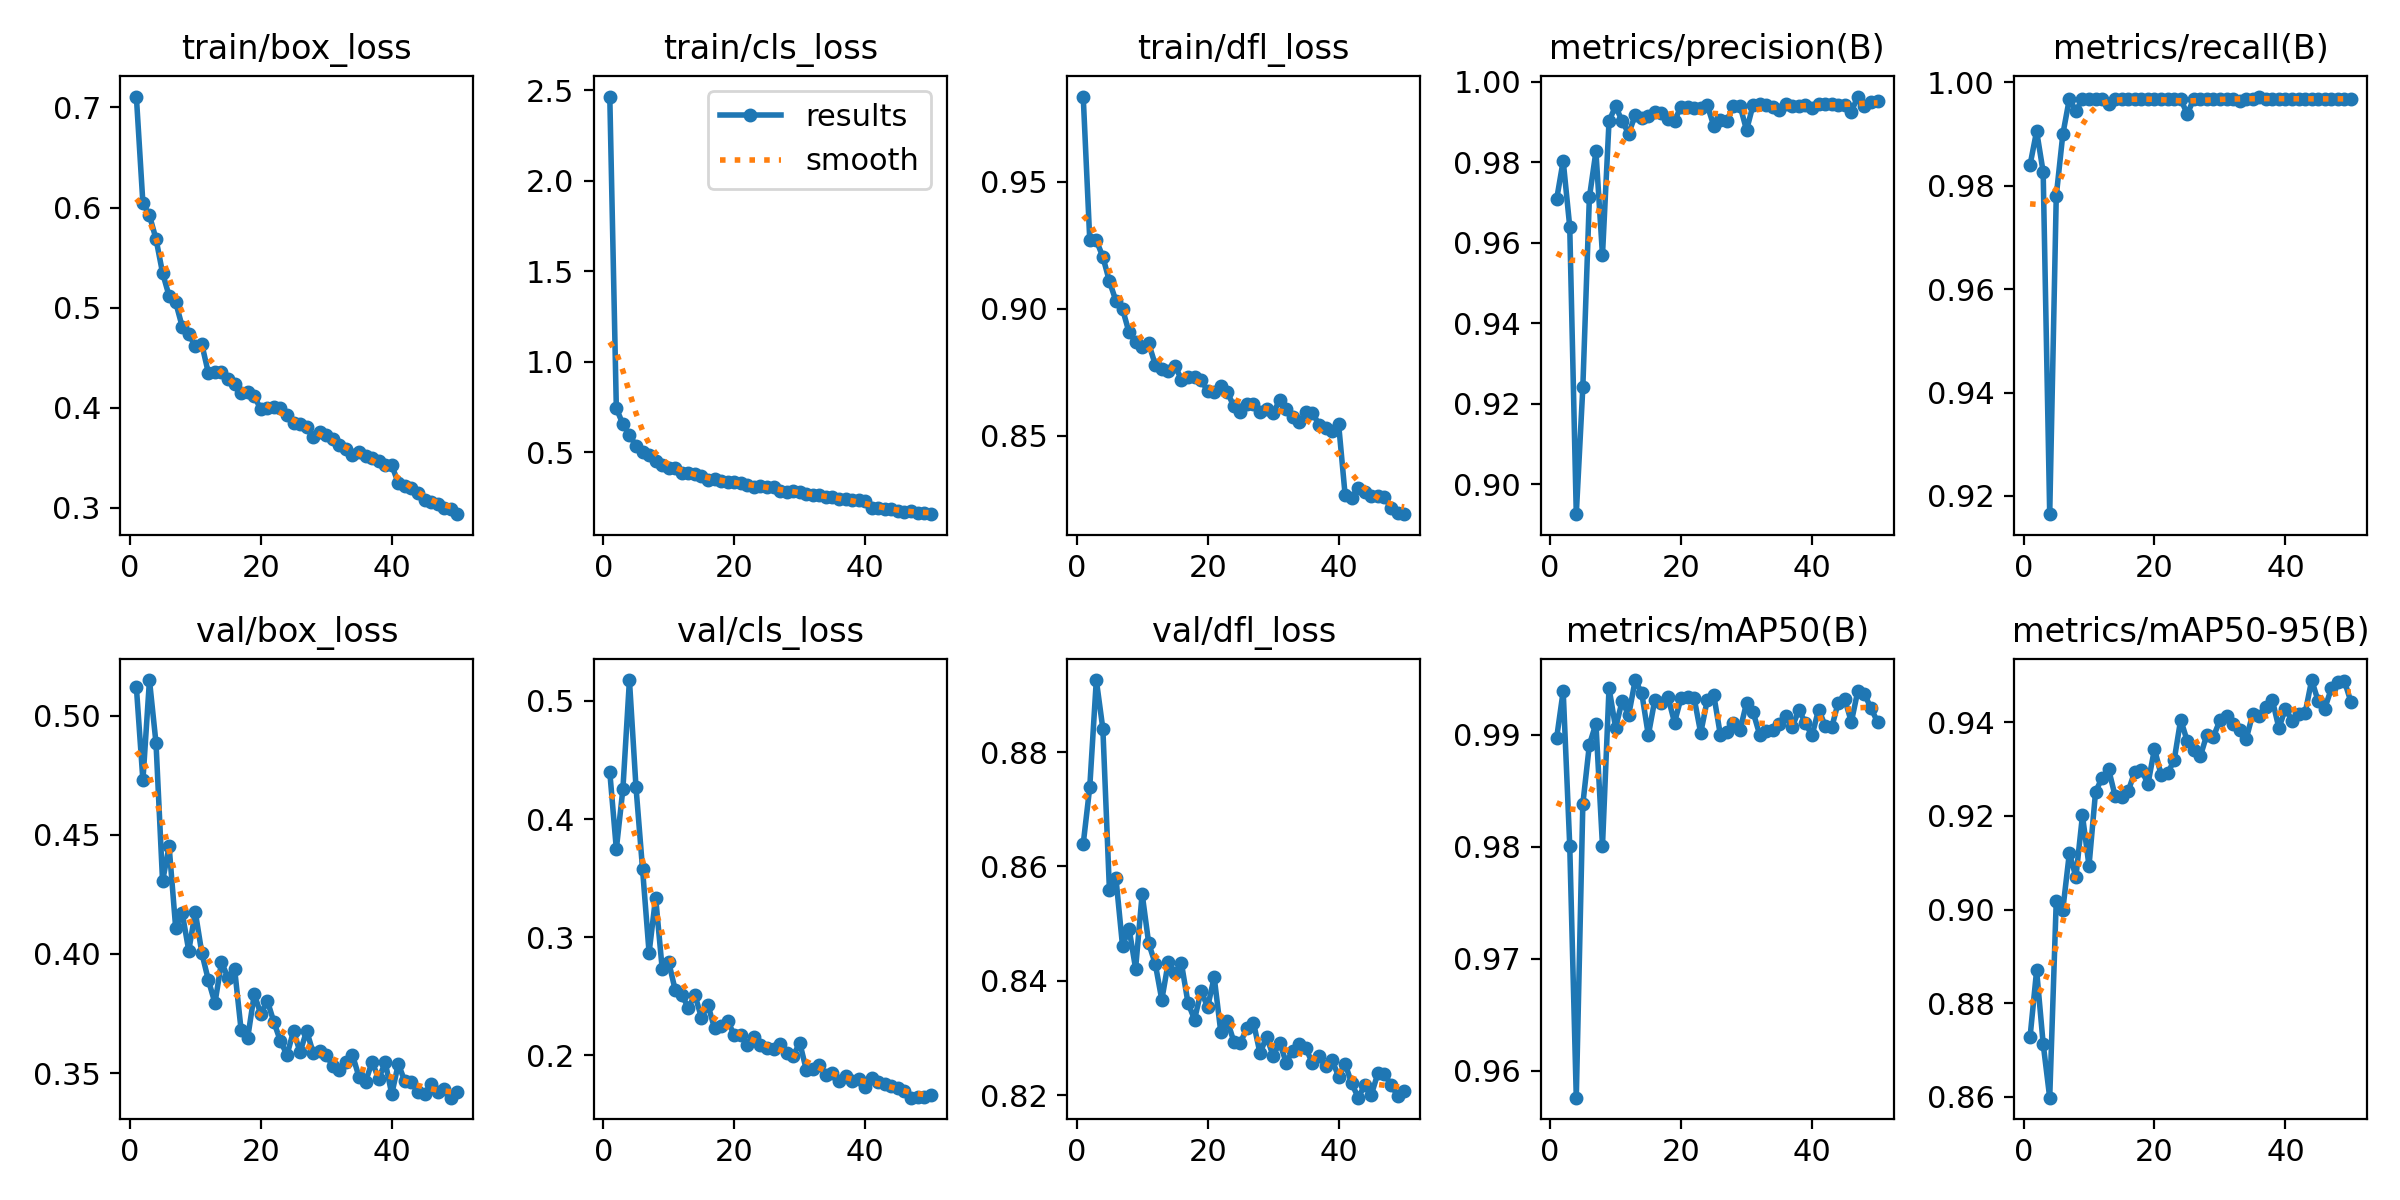

Curvas Precision-Recall:


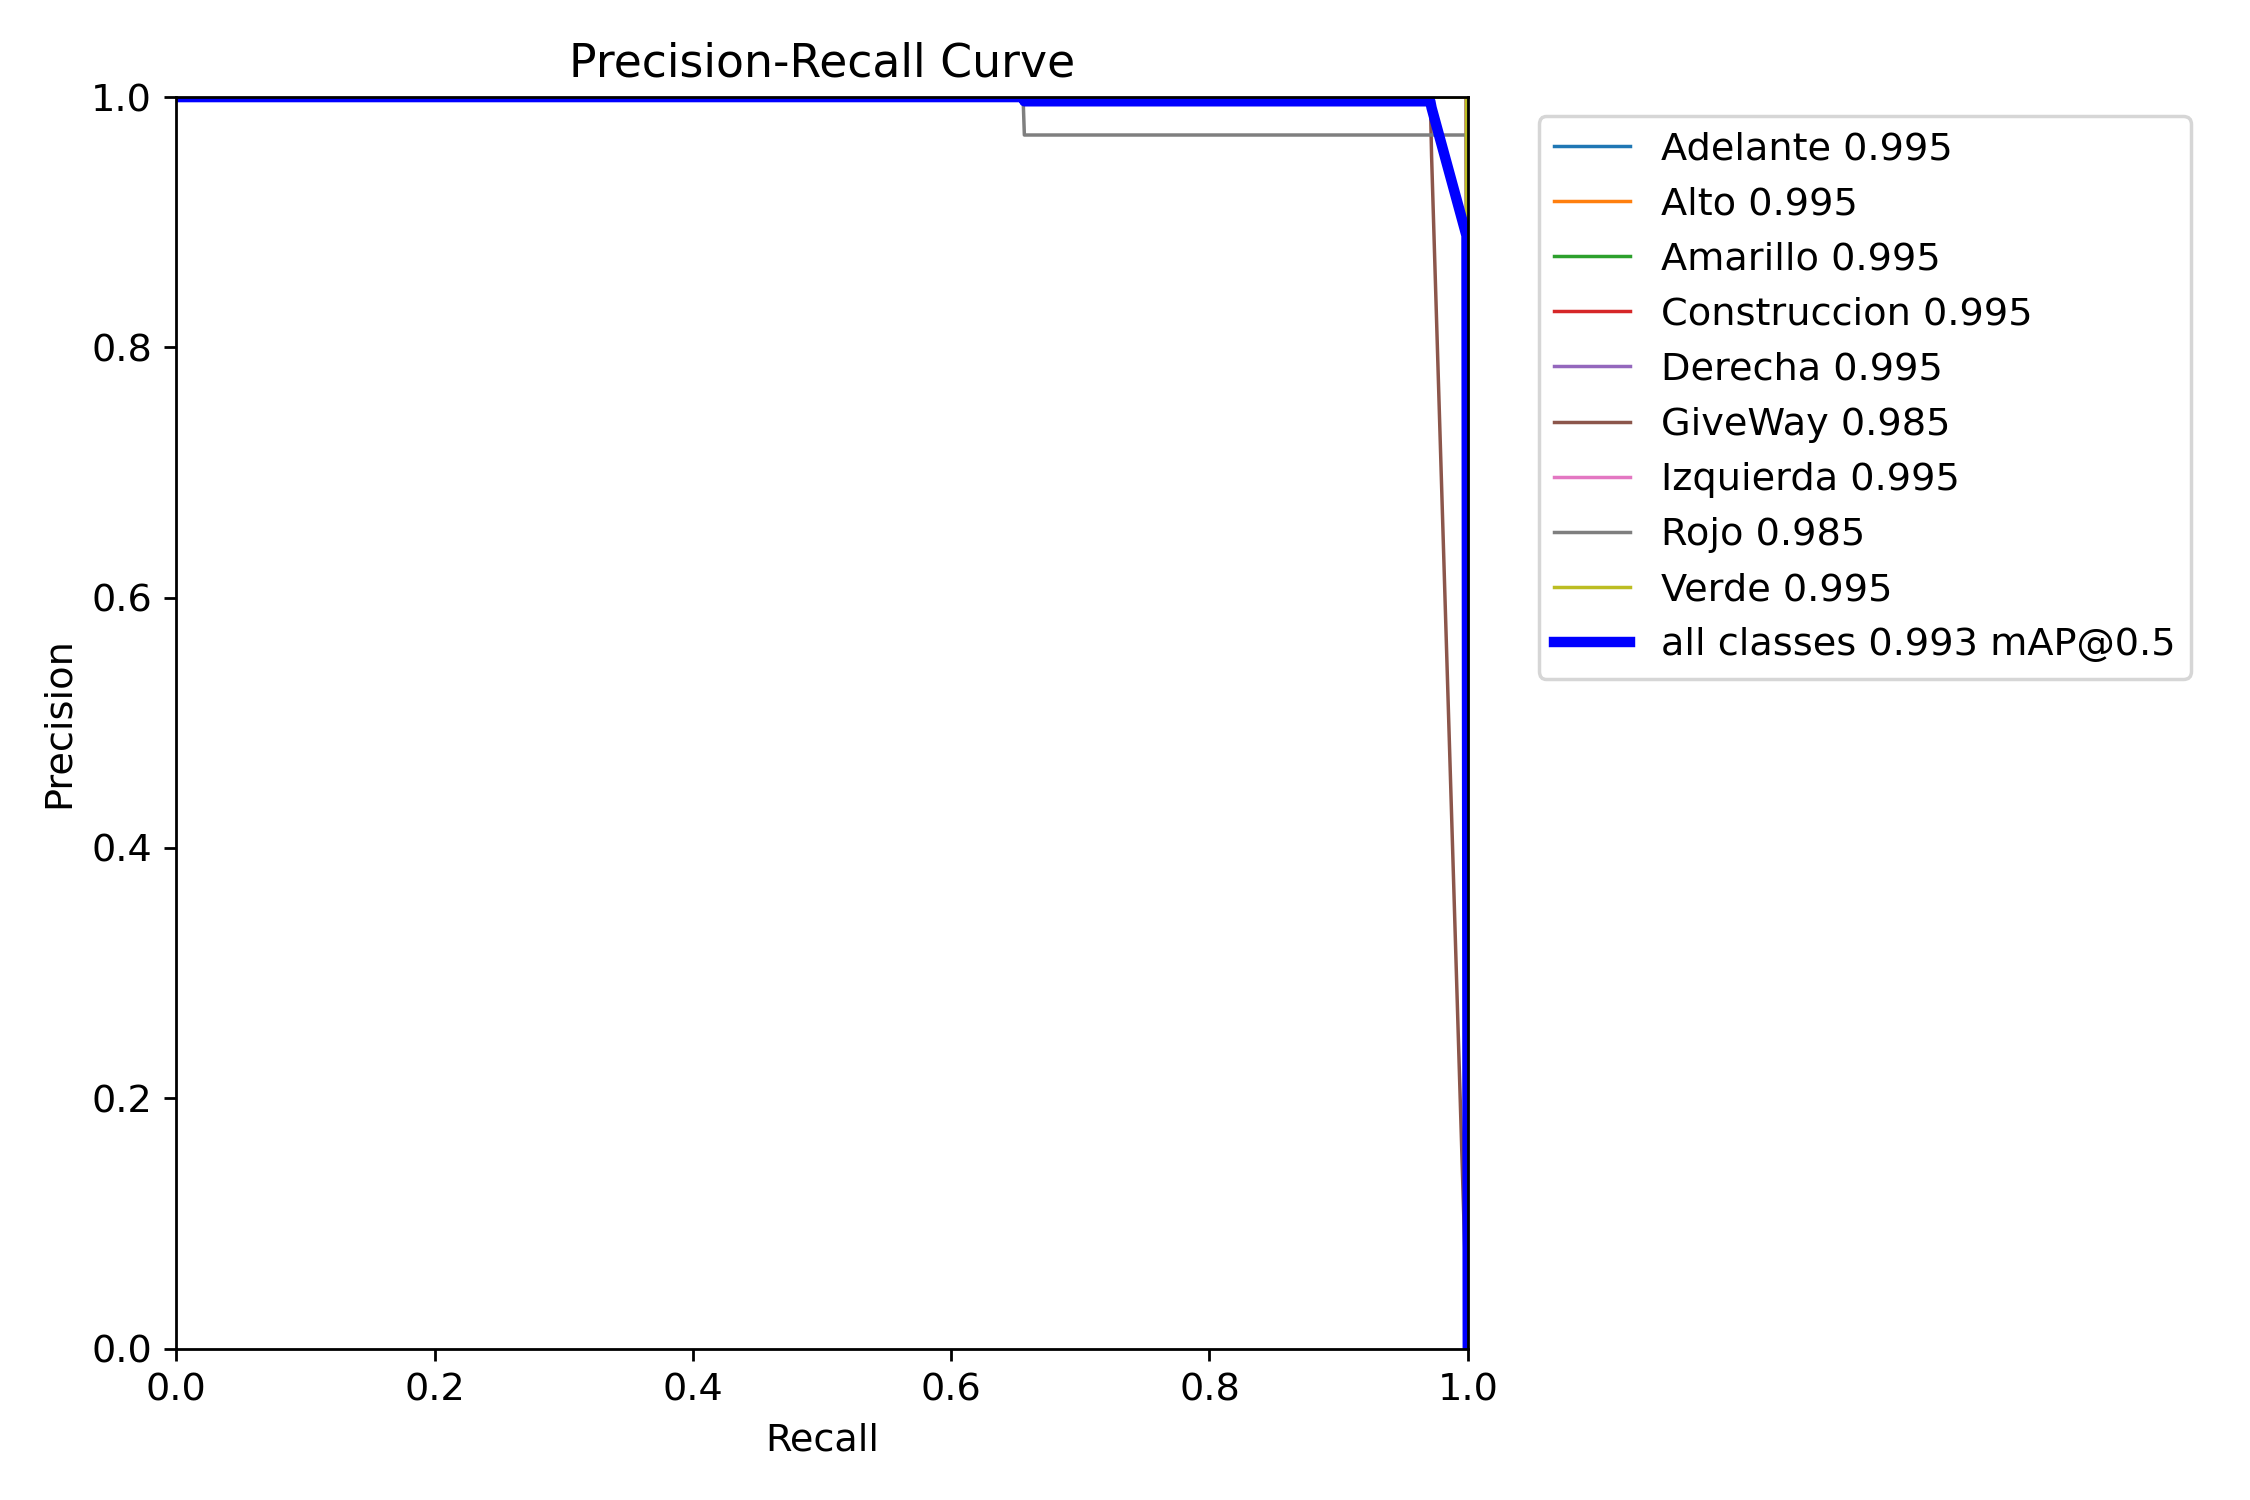

Matriz de confusión:


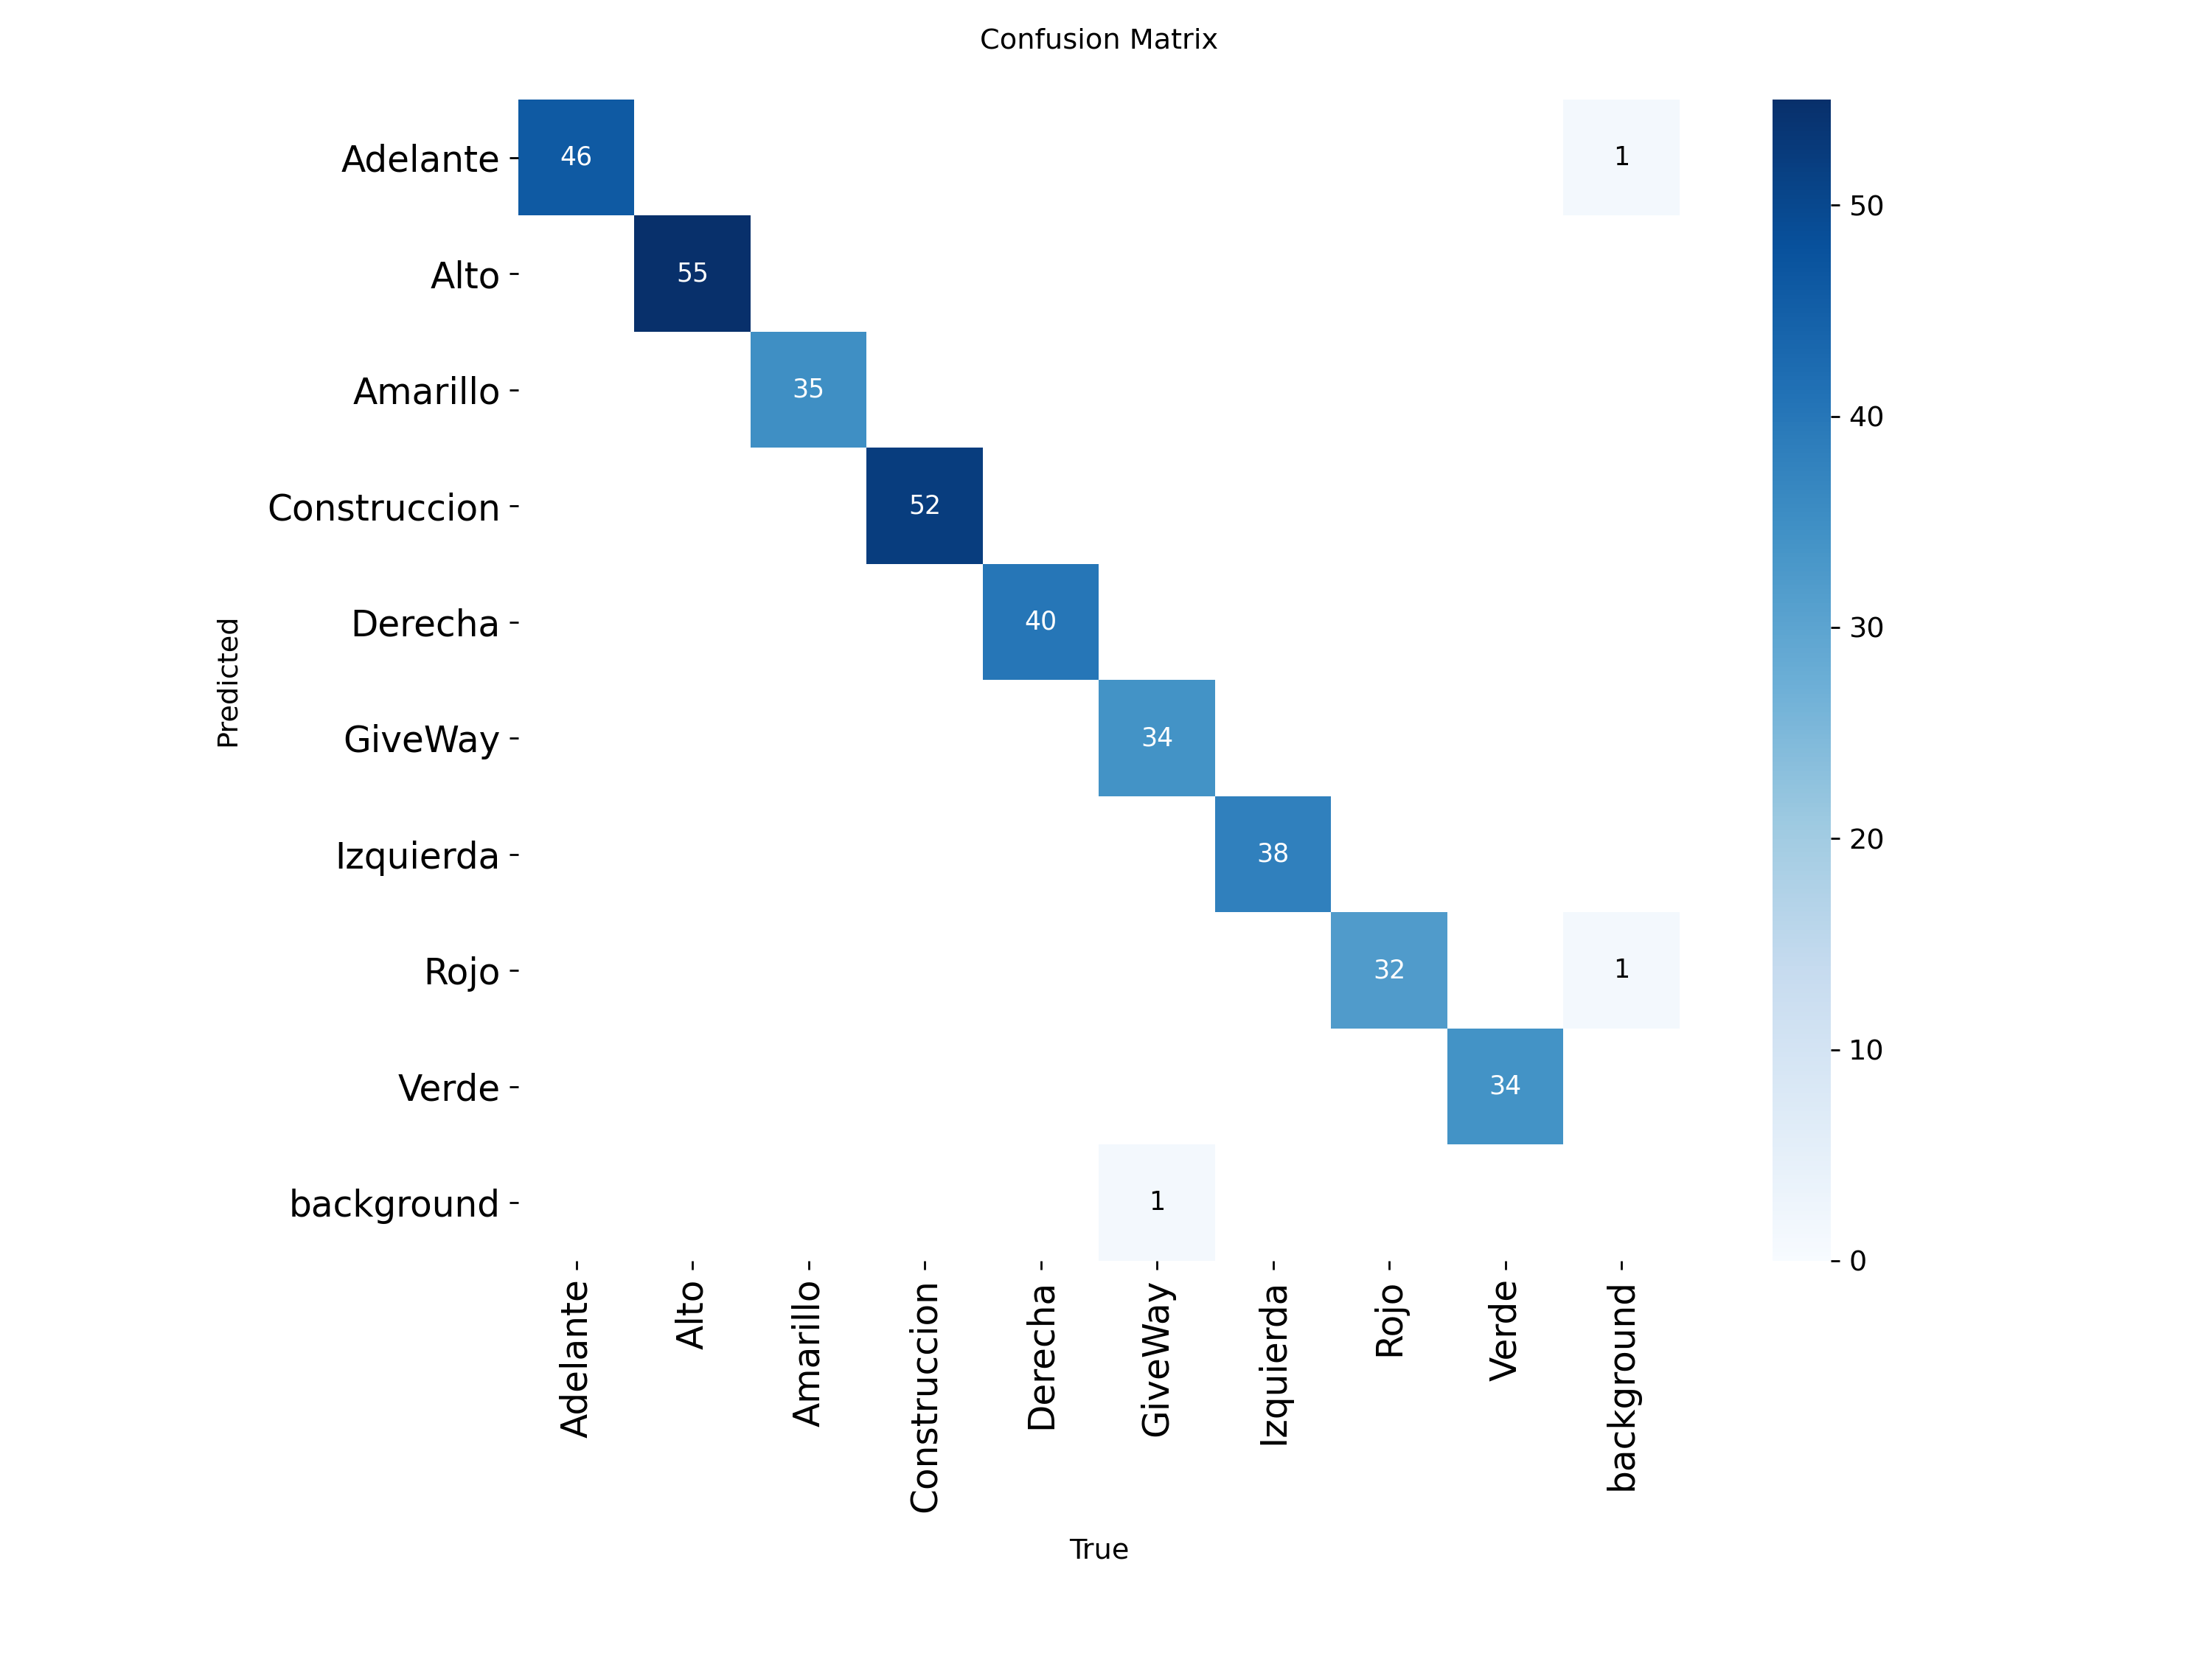

Predicciones del batch de validación:


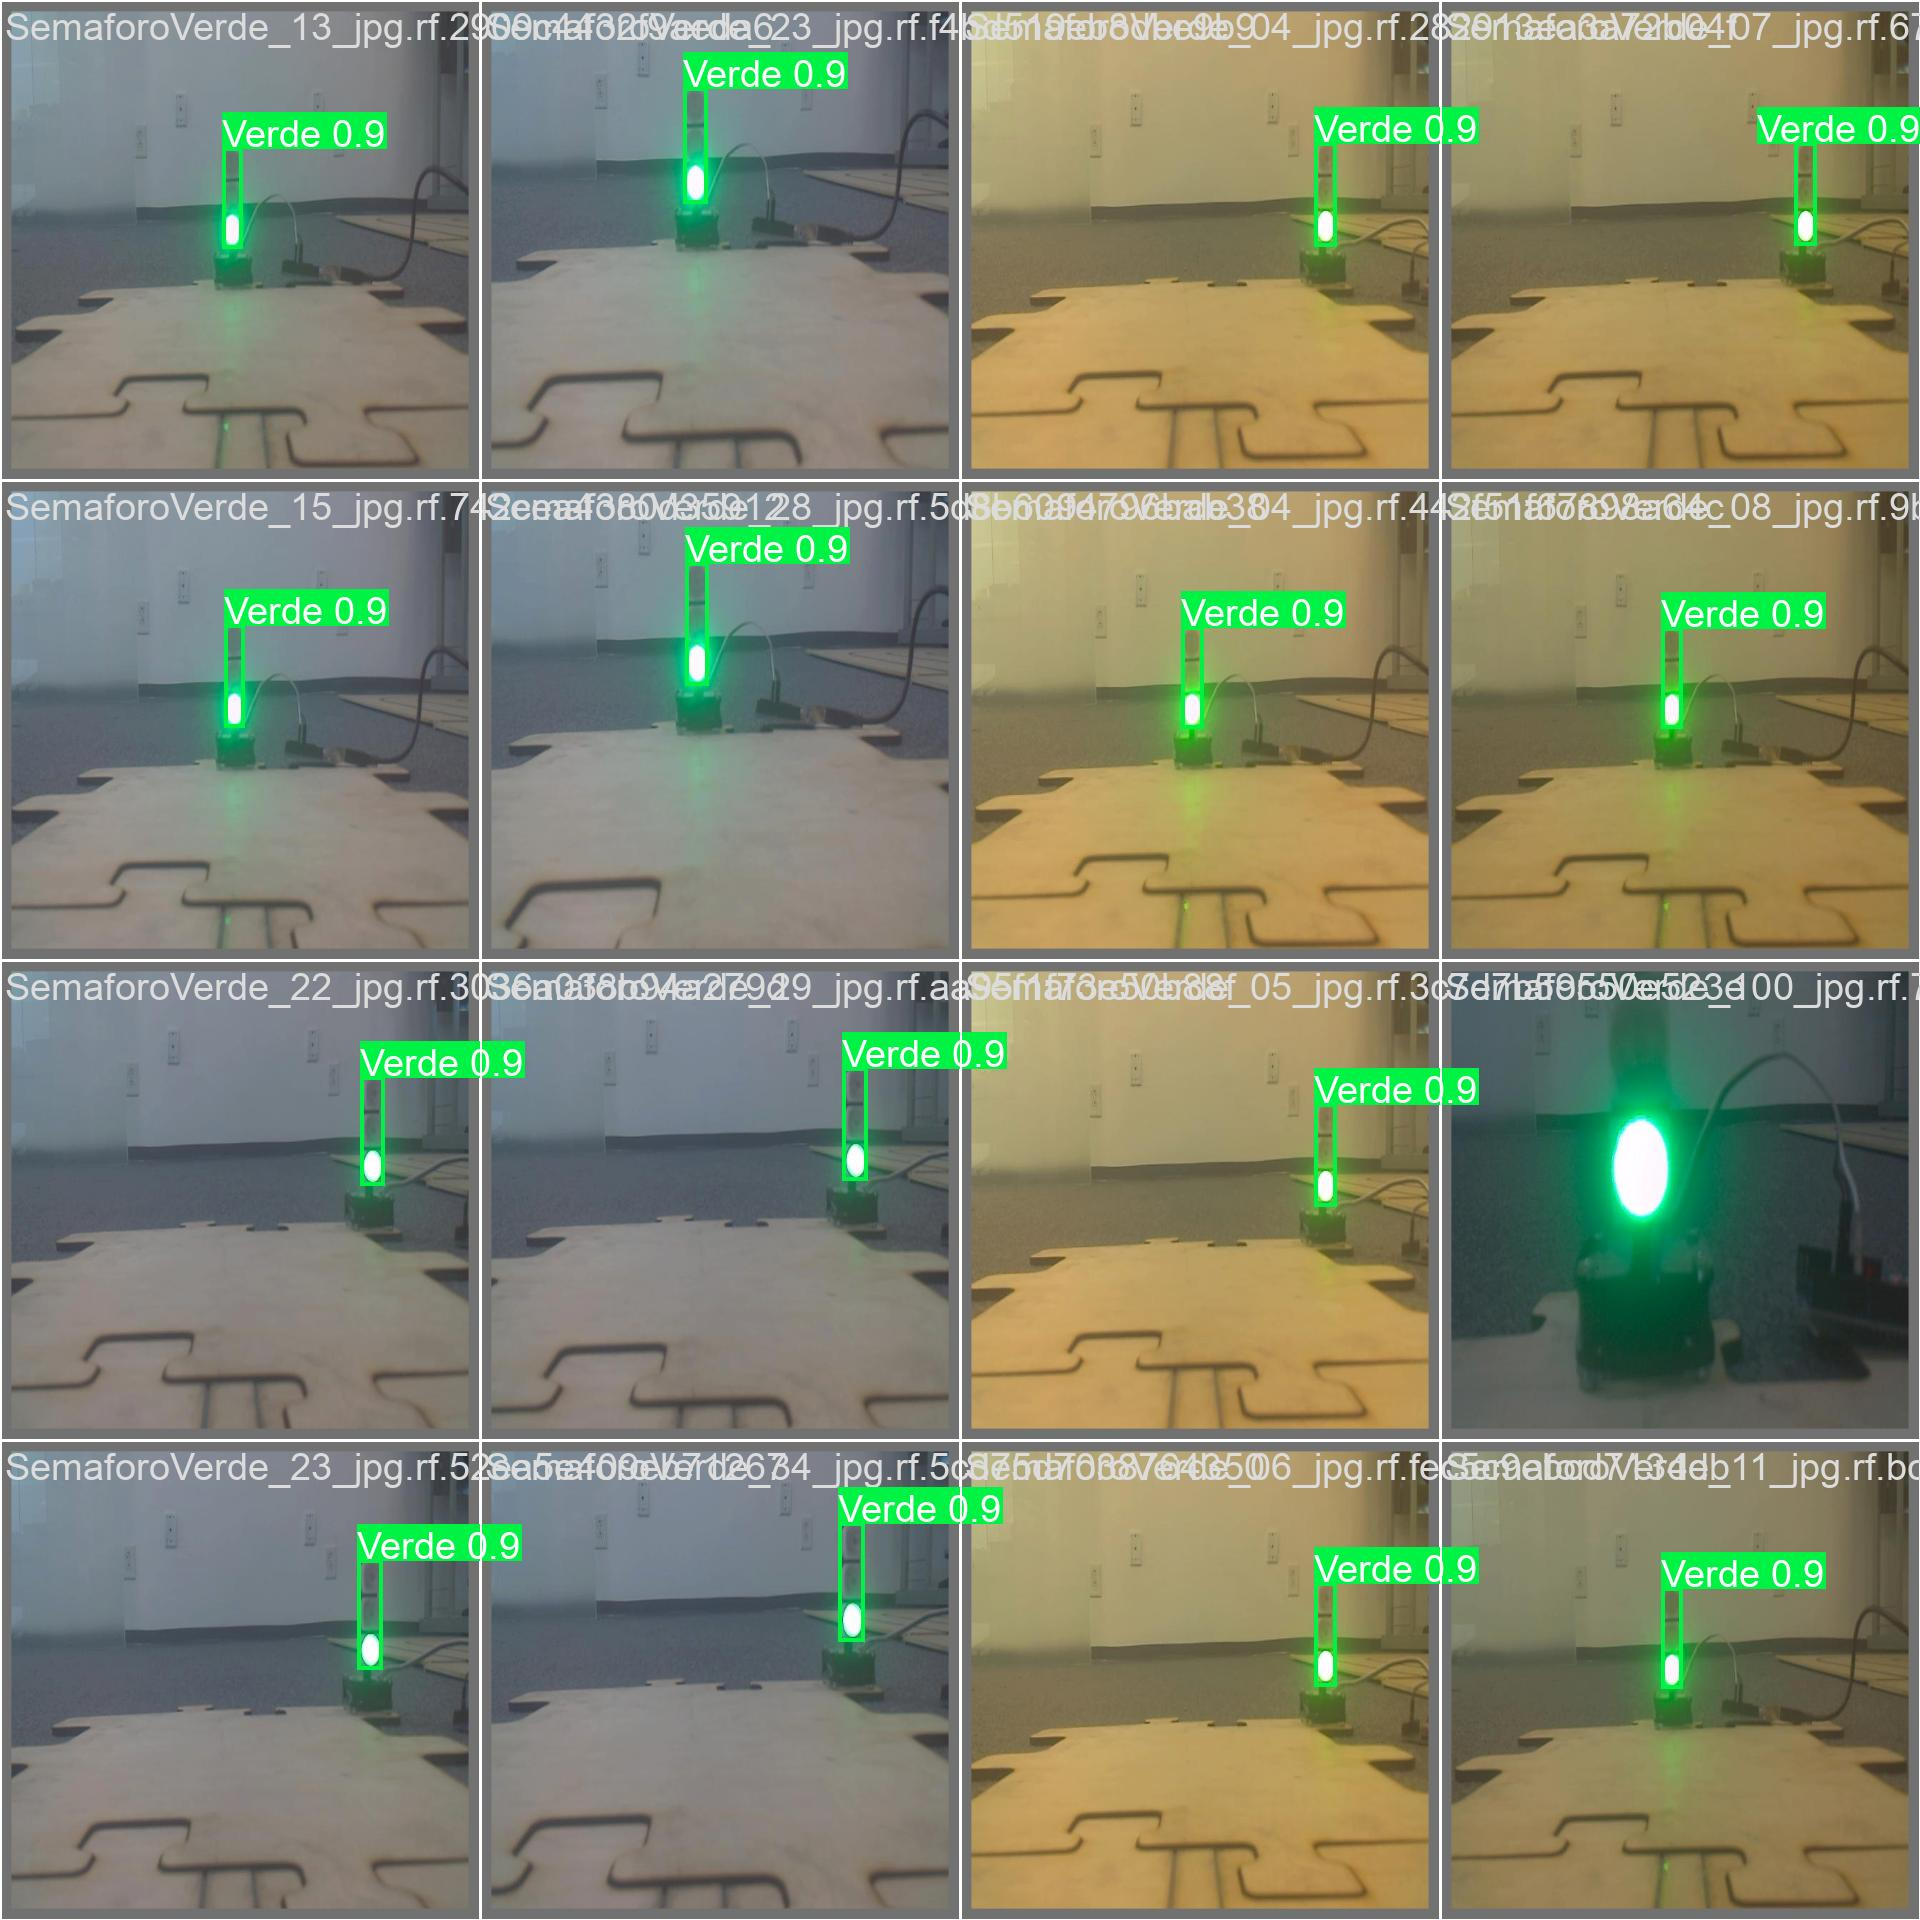

In [ ]:

!pip install -q ultralytics
from ultralytics import YOLO
from IPython.display import Image, display
import os


model = YOLO('runs/detect/yolov8s_results_custom_aug/weights/best.pt')
!yolo task=detect mode=val model='runs/detect/yolov8s_results_custom_aug/weights/best.pt' data='runs/detect/yolov8s_results_custom_aug/data.yaml'
results_img_path = 'runs/detect/yolov8s_results_custom_aug/results.png'
if os.path.exists(results_img_path):
    print("Gráfico de pérdida y métricas:")
    display(Image(filename=results_img_path, width=800))
else:
    print("No se encontró el archivo de resultados.")

pr_curve_path = 'runs/detect/yolov8s_results_custom_aug/PR_curve.png'
if os.path.exists(pr_curve_path):
    print("Curvas Precision-Recall:")
    display(Image(filename=pr_curve_path, width=800))
else:
    print("No se encontró el archivo PR_curve.png")

confusion_matrix_path = 'runs/detect/yolov8s_results_custom_aug/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    print("Matriz de confusión:")
    display(Image(filename=confusion_matrix_path, width=600))
else:
    print("No se encontró la matriz de confusión.")

val_batch_path = 'runs/detect/yolov8s_results_custom_aug/val_batch0_pred.jpg'
if os.path.exists(val_batch_path):
    print("Predicciones del batch de validación:")
    display(Image(filename=val_batch_path, width=600))
else:
    print("No se encontró la imagen de predicción del batch.")
